# **Diabetes Prediction**

This notebook presents the implementation of supervised classification algorithms aimed at predicting the class of examples provided in the dataset `Dataset_of_Diabetes.csv` (source: [Kaggle](https://https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset?resource=download)).


### **About the dataset**
The dataset contains 1,000 biomedical measurements and 14 patient characteristics. Here's a detailed description of the dataset columns:

- `ID`: A unique identifier for each record in the dataset.
- `No_Pation`: Another identifier for the patient. It might be a patient number or record ID.
- `Gender`: The gender of the patient (F for Female, M for Male).
- `AGE`: The age of the patient in years.
- `Urea`: Urea level in the blood (likely measured in mg/dL or mmol/L). Urea is a waste product of protein metabolism and can indicate kidney function.
- `Cr`: Creatinine level in the blood (likely measured in mg/dL or µmol/L). Creatinine is another waste product that indicates kidney function.
- `HbA1c`: Glycated hemoglobin, a measure of average blood sugar levels over the past 2-3 months (expressed as a percentage).
- `Chol`: Cholesterol level in the blood (likely measured in mg/dL or mmol/L). This typically refers to total cholesterol.
- `TG`: Triglycerides level in the blood (likely measured in mg/dL or mmol/L). Triglycerides are a type of fat in the blood.
- `HDL`: High-density lipoprotein cholesterol level (often called "good" cholesterol, measured in mg/dL or mmol/L).
- `LDL`: Low-density lipoprotein cholesterol level (often called "bad" cholesterol, measured in mg/dL or mmol/L).
- `VLDL`: Very low-density lipoprotein cholesterol level (measured in mg/dL or mmol/L).
- `BMI`: Body Mass Index, a measure of body fat based on height and weight (calculated as weight in kilograms divided by height in meters squared).
- `CLASS`: The class label indicating the diabetes status of the patient. The possible values are:
  - N: Non-diabetic
  - P: Prediabetic
  - Y: Diabetic

In [1]:
# Import the necessary libraries

# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import matplotlib.image as mpimg

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Methods and metrics for models evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

## **Dataset exploration**

In [2]:
# Download the dataset from my personal GithHub
!wget https://raw.githubusercontent.com/gabriel-gdp/my_codes/refs/heads/main/Classification/Dataset_of_Diabetes.csv -O Dataset_of_Diabetes.csv

# Visualize five random samples
df = pd.read_csv('Dataset_of_Diabetes.csv')
display(df.sample(5))

--2025-05-26 13:54:43--  https://raw.githubusercontent.com/gabriel-gdp/my_codes/refs/heads/main/Classification/Dataset_of_Diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50511 (49K) [text/plain]
Saving to: ‘Dataset_of_Diabetes.csv’

Dataset_of_Diabetes 100%[===================>]  49.33K  --.-KB/s    in 0.002s  

2025-05-26 13:54:43 (22.7 MB/s) - ‘Dataset_of_Diabetes.csv’ saved [50511/50511]



,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
406,135,34358,F,61,10.5,111,8.2,3.8,3.00,0.9,1.7,1.3,39.00,Y
885,48,45215,F,60,4.8,44,8.0,3.5,1.80,1.4,1.4,0.8,27.00,Y
72,89,4172,F,41,2.0,39,4.0,3.4,1.20,1.7,1.1,0.5,21.00,N
323,184,45431,F,55,11.7,136,9.6,5.2,1.50,1.1,3.5,0.7,29.00,Y
729,621,98564,M,55,5.0,81,3.7,5.7,1.19,1.1,4.1,8.1,35.16,Y


In [3]:
# Informations about columns data type and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [4]:
# Check missing values
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [5]:
# Quantitative analysis
df.drop(['ID', 'No_Pation'], axis=1).describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


According to the quantitative analysis, the samples take into account individuals aged 20 to 79, with an average age of almost 53.5 years.

Since the variable `Cr` appears to have a wide range of values, a thorough picture requires visualizing the distributions of the variables, in order to detect possible outliers.

Text(0.5, 1.0, 'Distributions of the variables')

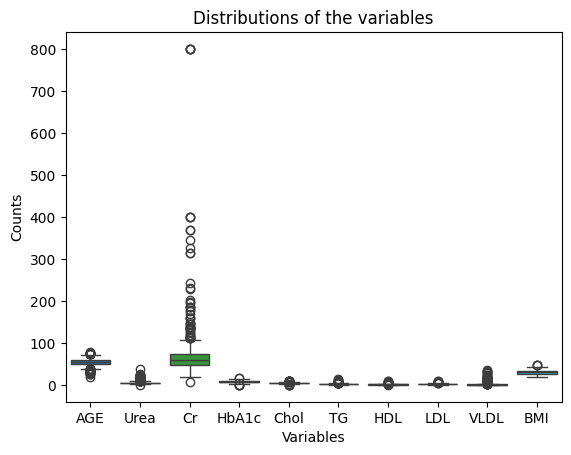

In [6]:
# Outliers check
sns.boxplot(data=df.drop(['ID', 'No_Pation'], axis=1).select_dtypes(include=np.number))
plt.xlabel("Variables")
plt.ylabel('Counts')
plt.title("Distributions of the variables")

- Central box: represents the interquartile range (IQR), which includes the middle 50% of the data (from the first quartile (Q1) to the third quartile (Q3)).

- Horizontal line inside the box: indicates the median (Q2) of the distribution.

- Whiskers: extend to the minimum and maximum values that are not considered outliers, typically defined as being within 1.5 × IQR from the lower and upper quartiles.

- Points beyond the whiskers (circles): represent potential outliers, i.e., data points that lie outside the expected range and may require further investigation.


It is evident that there are numerous outlier points in the `Cr` variable.
Since it is not possible to know whether very high `Cr` values are anomalous (but possible) or simply recording errors, all values will be considered.

There is a problem with `object` type columns `Gender` and `CLASS`:
- `Gender` contains: 'M', 'F', 'f';
- `CLASS` contains: 'N', 'N ', 'P', 'Y', 'Y ';

The number of distinct values in the columns are affected by these typos.

In [7]:
print('Original')
print(f'  CLASS: {df.CLASS.unique()}')
print(f'  Gender: {df.Gender.unique()}')

# Replace to correct
df.CLASS.replace(to_replace= 'N ', value= 'N', inplace=True)
df.CLASS.replace(to_replace= 'Y ', value= 'Y', inplace=True)
df.Gender.replace(to_replace='f', value='F', inplace=True)

print('\nCorrected')
print(f'  CLASS: {df.CLASS.unique()}')
print(f'  Gender: {df.Gender.unique()}')

Original
  CLASS: ['N' 'N ' 'P' 'Y' 'Y ']
  Gender: ['F' 'M' 'f']

Corrected
  CLASS: ['N' 'P' 'Y']
  Gender: ['F' 'M']


,count
Gender,
M,565
F,435


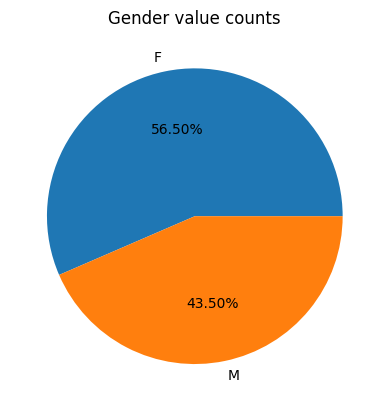

In [8]:
# Gender distribution
genders = df.Gender.unique()
gender_sizes = df.Gender.value_counts()
display(gender_sizes)

# Pie chart of genders
fig, ax = plt.subplots()
ax.pie(gender_sizes.values, labels=genders, autopct='%1.2f%%')
ax.set_title('Gender value counts')
plt.show()

,count
CLASS,
Y,844
N,103
P,53


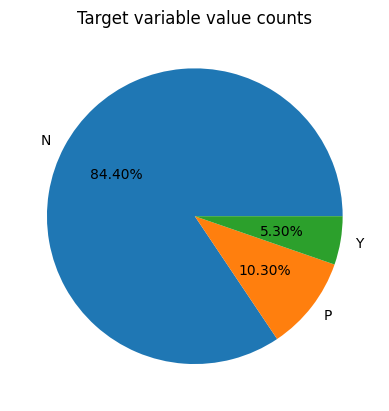

In [9]:
# CLASS distribution
labels = df.CLASS.unique()
sizes = df.CLASS.value_counts()  # class size
display(sizes)

# Pie chart of target classes
fig, ax = plt.subplots()
ax.pie(sizes.values, labels=labels, autopct='%1.2f%%')
ax.set_title('Target variable value counts')
plt.show()

The three classes are significantly out of balance among the dataset's samples, as this graphic demonstrates.  When preparing the data, this will need to be taken into consideration.

The information provided by the `Gender` and `CLASS` variables must be converted into numerical values in order to be used and plotted in a correlation scatter matrix. Sklearn's `LabelEncoder` can accomplish this.

In [10]:
# object type variables encoding
le_gender = LabelEncoder()
le_class = LabelEncoder()

le_gender.fit(df.Gender)
le_class.fit(df.CLASS)

df['CLASS'] = le_class.transform(df.CLASS)
# 0:N , 1:P , 2:Y
df['Gender'] = le_gender.transform(df.Gender)
# 0:F , 1:M

# Inverse transformation
# df['CLASS'] = le_class.inverse_transform(df.CLASS)
# df['Gender] = le_gender.inverse_transform(df.Gender)

# Mapping
# print(dict(zip(le_class.classes_, le_class.transform(le_class.classes_))))
# print(dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

<Axes: >

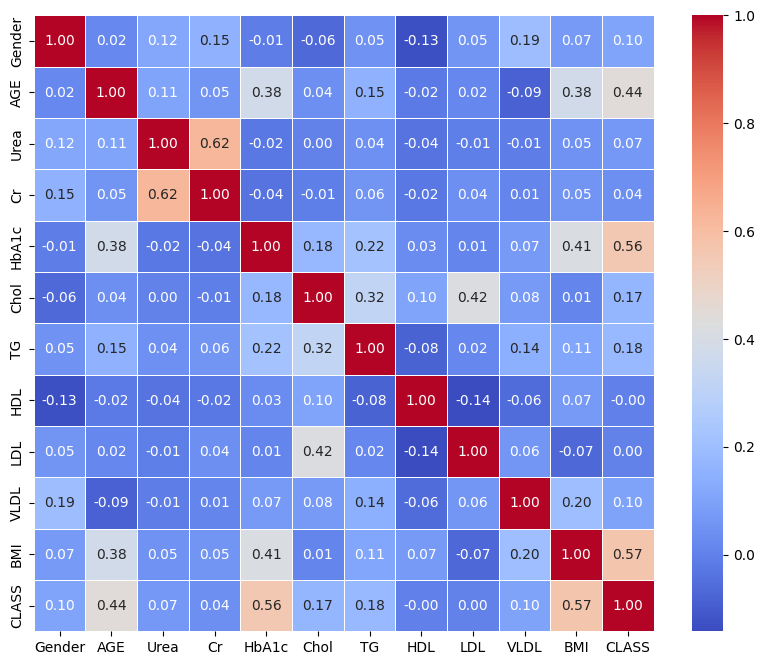

In [11]:
# Scatter plot correlation matrix
correlation_matrix = df.drop(['ID', 'No_Pation'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

The correlation between each variable and the target variable is displayed in this graphic. Here are a few observations:

- `Cr` and `Urea` exhibit the highest correlation; in fact, blood levels of creatinine and urea both signal kidney function;
- `AGE`, `HbA1c` and `BMI` have the strongest correlation with the target variable `CLASS`;
- `HDL` and `LDL` have the weakest correlation with the target variable `CLASS`;

## **Data Preprocessing (1)**

Preprocessing involves a few steps that get the data ready for classification algorithms. This includes:
- features and target separation;
- features standardization: mean 0 and standard deviation 1, provided by `StandardScaler()`;
- train-test splitting with target stratification, provided by `train_test_split`.

Target stratification guarantees that minority class samples are included in test data.

In [26]:
features = ['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI']
# HDL and LDL are removed according to their low correlation with target variable
# Cr is removed because it is highly correlated with Urea, and this way, all its outliers are also avoided
target = 'CLASS'

In [28]:
X1 = df[features]
y = df[target]

# Standardization
std_scaler = preprocessing.StandardScaler()
X1_std = std_scaler.fit_transform(X1)

print(f'Data description after standardization')
print(f'X1_std mean: {X1_std.mean():.2f}')
print(f'X1_std std : {X1_std.std():.2f}')

# Train, test split
test_size = 0.20  # 80% train and 20% test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_std, y, test_size= test_size, random_state=123, stratify=y)

print(f'\nTrain shape: {X1_train.shape}')
print(f'Test shape: {X1_test.shape}')

Data description after standardization
X1_std mean: -0.00
X1_std std : 1.00

Train shape: (800, 8)
Test shape: (200, 8)


## **Data Preprocessing (2)**

In this case, the same operations are performed, but only the features that are more correlated with the target variable are selected, to investigate how this selection affects the performance of the models.

In [29]:
# Sorting correlation values
correlation_values = abs(df.corr()['CLASS']).drop(['CLASS', 'ID', 'No_Pation'], axis=0)
display(correlation_values.sort_values(ascending=False))
topfeat = correlation_values.sort_values(ascending=False)[:5]
print(f'Selected features: {topfeat.index} \n')

# top features selection
features = topfeat.index
target = 'CLASS'

X2 = df[features]
y = df[target]

# Standardization
std_scaler = preprocessing.StandardScaler()
X2_std = std_scaler.fit_transform(X2)

print(f'Data description after standardization')
print(f'X2_std mean: {X2_std.mean():.2f}')
print(f'X2_std std : {X2_std.std():.2f}')

# Train, test split
test_size = 0.20
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_std, y, test_size= test_size, random_state=42, stratify=y)

print(f'\nTrain shape: {X2_train.shape}')
print(f'Test shape: {X2_test.shape}')

,CLASS
BMI,0.569879
HbA1c,0.555321
AGE,0.443009
TG,0.182299
Chol,0.167375
Gender,0.103397
VLDL,0.101247
Urea,0.067010
Cr,0.037500
LDL,0.004247


Selected features: Index(['BMI', 'HbA1c', 'AGE', 'TG', 'Chol'], dtype='object') 

Data description after standardization
X2_std mean: -0.00
X2_std std : 1.00

Train shape: (800, 5)
Test shape: (200, 5)


## **Model implementation and performances**

After model definition, a `GridSearchCV` (Cross-Validation) is conducted to determine the optimal model hyperparameters based on `accuracy` score.

The dataset is split into `n_splits` sub-datasets using the cross validation approach, which trains the model on n_splits-1 sub-datasets, saving the final one for testing. The division is then carried out again, leaving a new sub-dataset for testing. This process is done until all of the data have been used, and the final performances show the model's average performance throughout all testing phases.

Printing a `classification_report` and plotting a `confusion_matrix` allows to see how well the models perform.

The descriptions of the model hyperparameters are taken from [sklearn](https://https://scikit-learn.org/stable/index.html).

The following metrics are taken into consideration in order to assess the model's performance:

- `accuracy`: fraction of correct predictions out of the total;
- `precision`: how reliable the positive predictions are, a high value indicates few false positives;
- `recall`: model's ability to find all true positives, a high value indicates few false negatives;
- `f1-score`: harmonic mean between precision and recall;

## Logistic Regression

`LogisticRegression` hyperparameters:
- `penalty`: specify the norm of the penalty: L1, L2 or both (elasticnet);
- `C`: inverse of regularization strength; must be a positive float, like in support vector machines, smaller values specify stronger regularization;
- `solver`: algorithm to use in the optimization problem;
- `multi_class`: 'auto' selects 'ovr' if the data is binary, or if solver is 'liblinear', then a binary problem is fit for each label;
- `class_weight`: weights associated with classes, if None, all classes are supposed to have weight one.

GridSearch best parameters: {'C': 1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Best average accuracy: 0.912

Logistic Regression Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.46      0.60      0.52        10
           2       0.98      0.95      0.97       169

    accuracy                           0.93       200
   macro avg       0.76      0.82      0.78       200
weighted avg       0.94      0.93      0.93       200



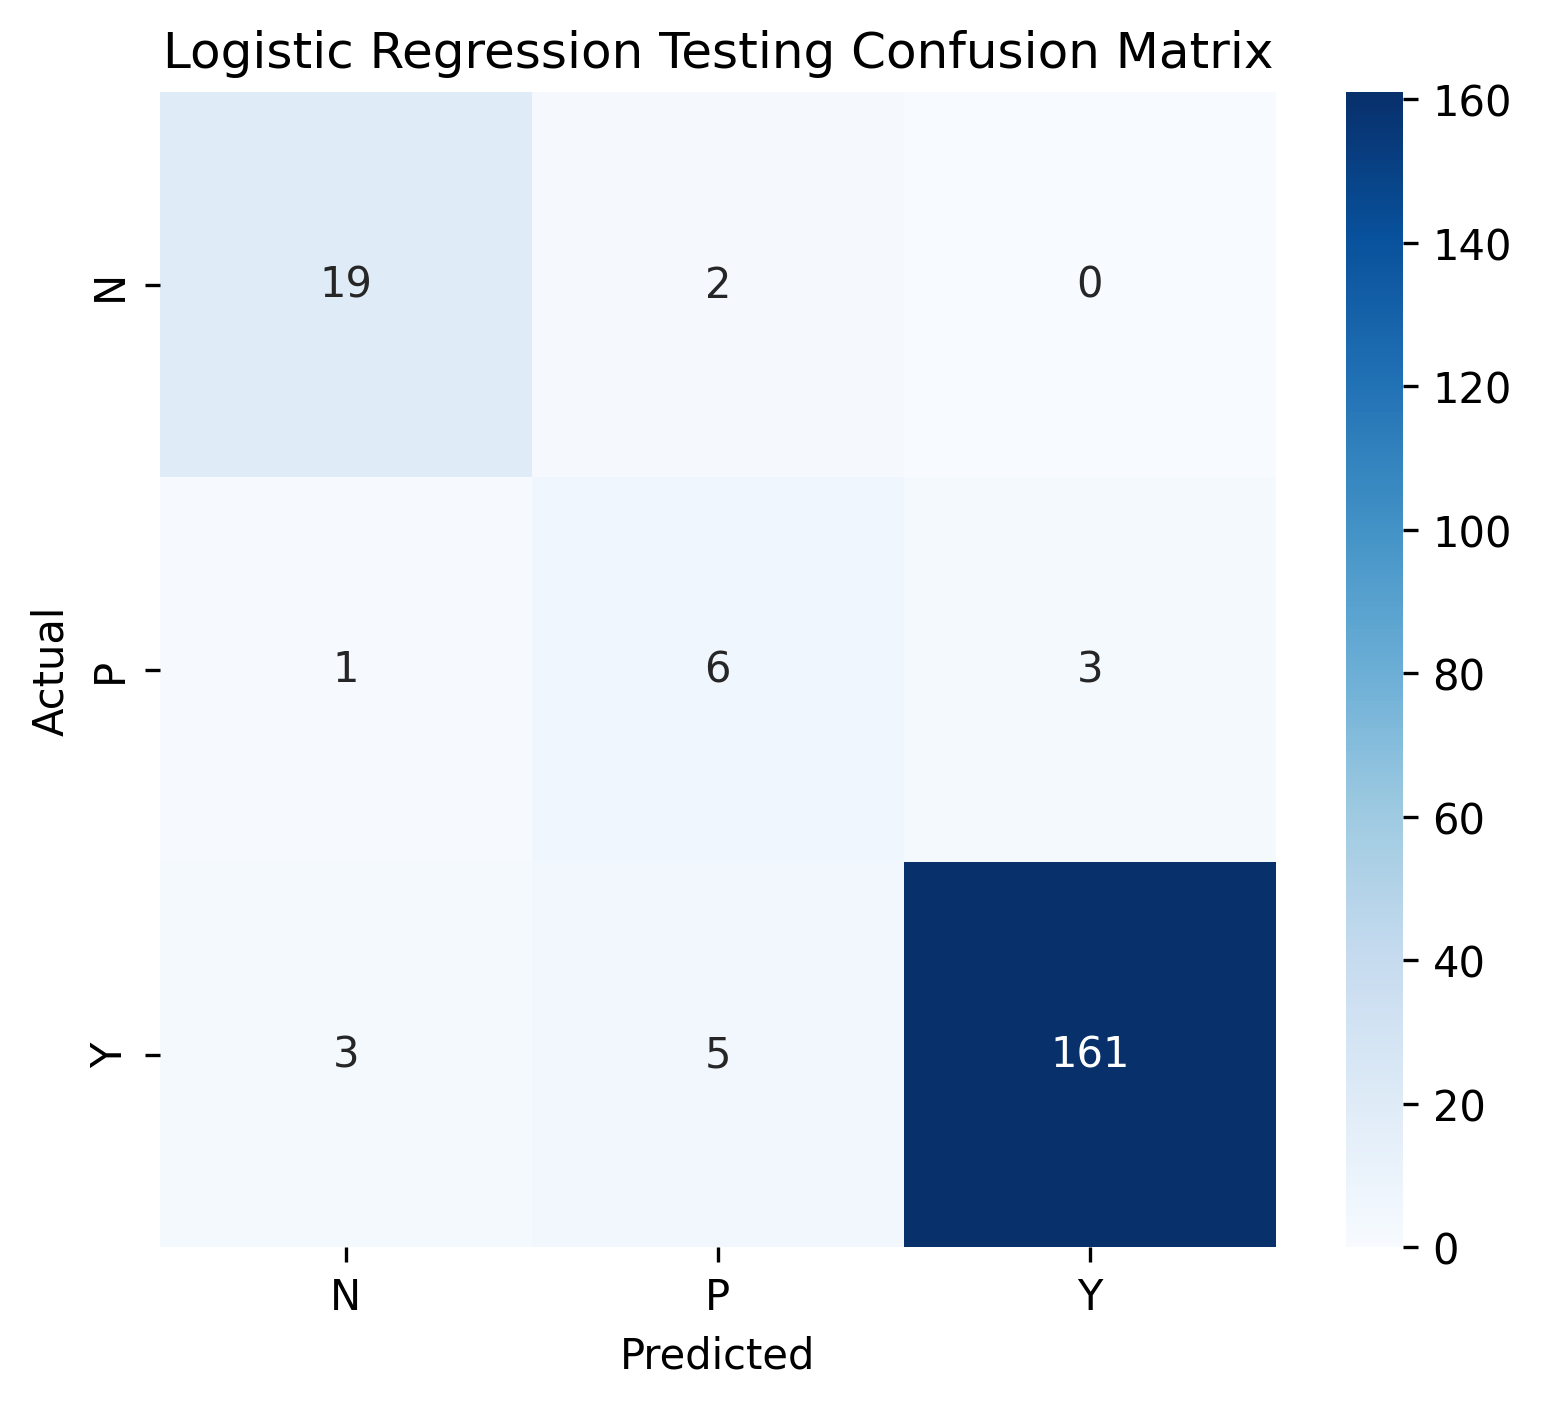

In [30]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
              'C': list(range(1, 6)),
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}  # values to be tested
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X1_train, y1_train)
print("GridSearch best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X1_test)

print("\nLogistic Regression Testing Data Classification Report:")
classification_report_lr = classification_report(y1_test, y_pred_lr)
print(classification_report_lr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y1_test, y_pred_lr)
labels = ['N', 'P', 'Y']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Logistic Regression Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_lr.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_lr.png', height=500, width=500))

The classification report shows that the model has an accuracy of 93%, but a targeted analysis of the model's performance for each class highlights that the model struggles to classify correctly.

As can be observed from the confusion matrix, the worst-case situation is in class 1 (P), where the model's accuracy is 46% and there are a lot of false negatives. Out of the seven patients that are categorized as P, two are N and five are Y. This 60% recall further supports this inaccurate classification.

The model performs better in the other two classes (N and Y), but it still needs to be improved because misclassifications in this kind of study are costly.

## Logistic Regression with feature selection

Let's see if selecting some features more correlated with the target improves the model's predictions.

GridSearch best parameters: {'C': 3, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Best average accuracy: 0.918

Logistic Regression Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.50      0.60      0.55        10
           2       0.98      0.97      0.98       169

    accuracy                           0.94       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.94      0.94      0.94       200



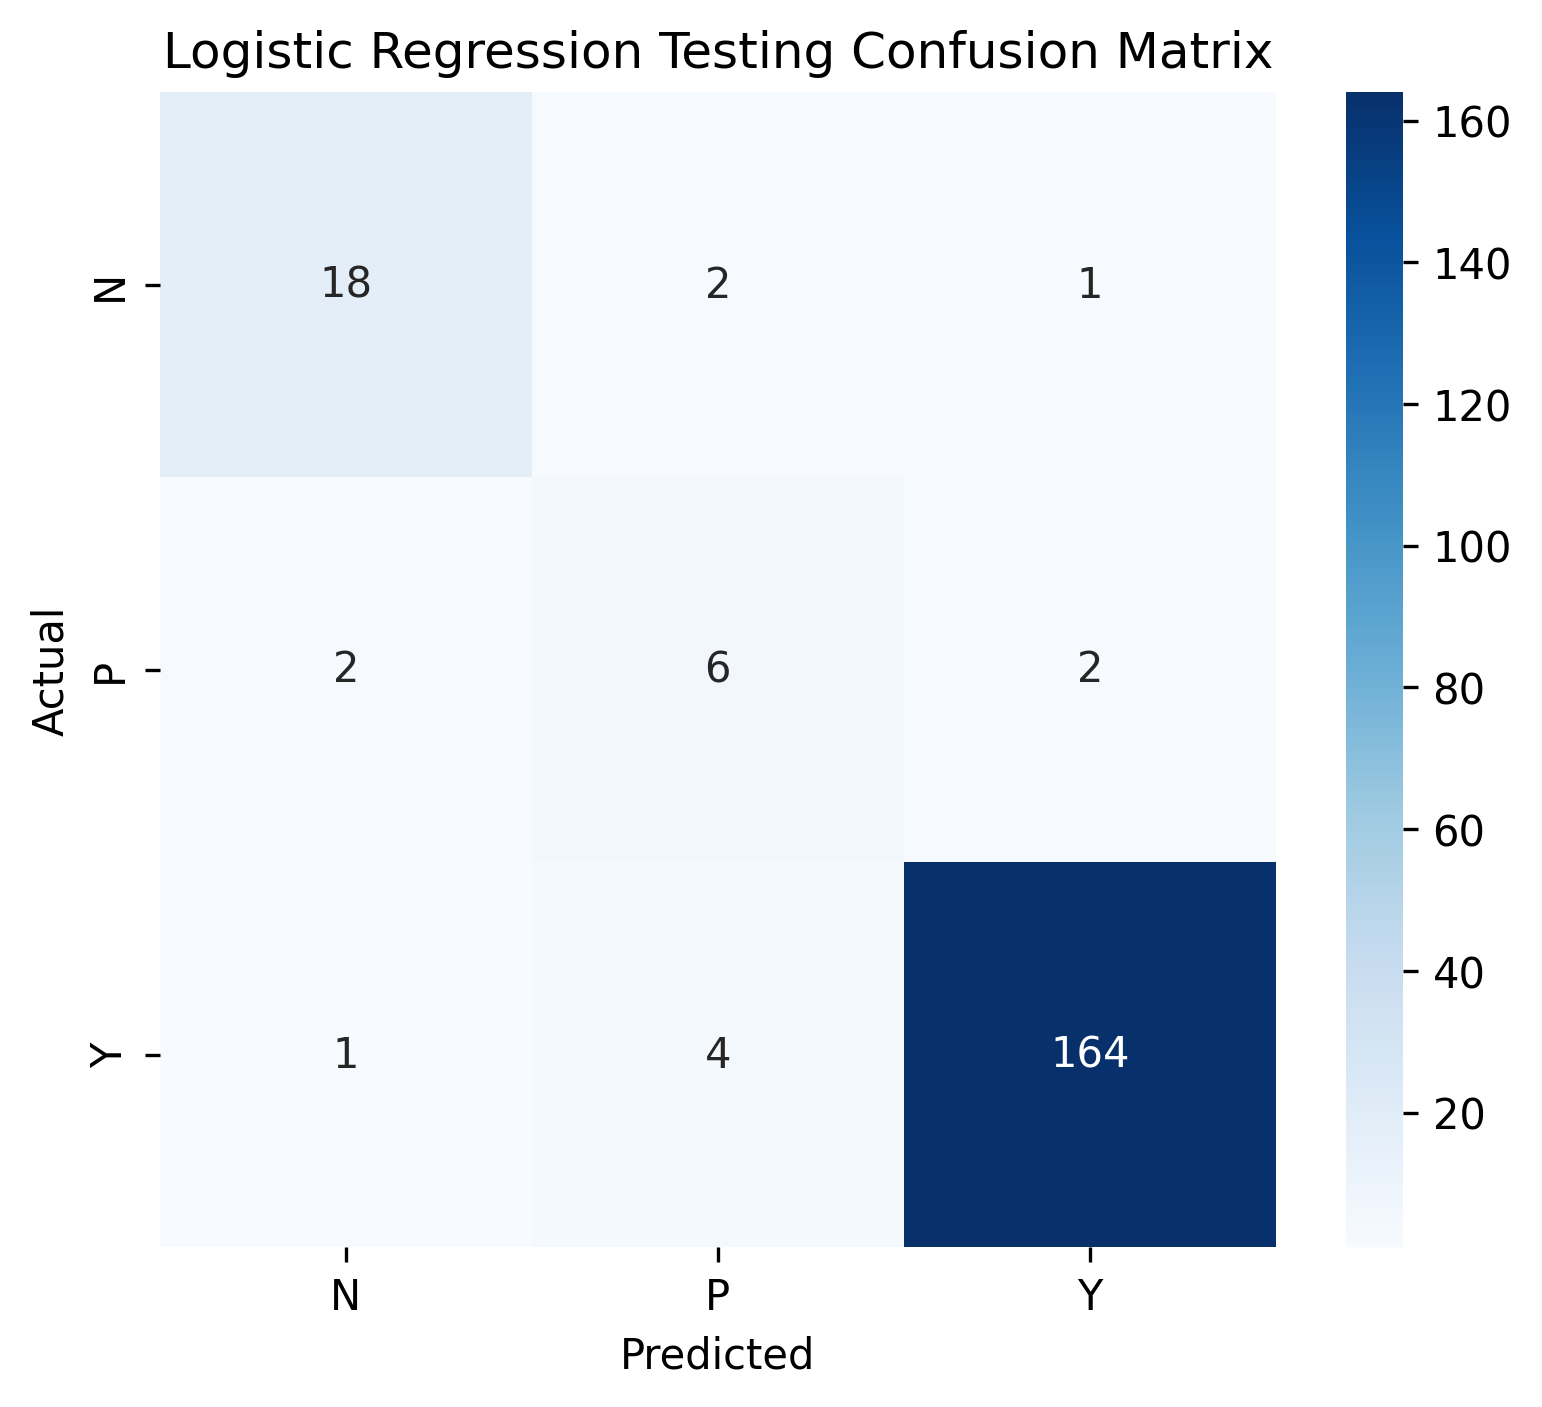

In [31]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
              'C': list(range(1, 6)),
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}  # values to be tested
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X2_train, y2_train)
print("GridSearch best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X2_test)

print("\nLogistic Regression Testing Data Classification Report:")
classification_report_lr = classification_report(y2_test, y_pred_lr)
print(classification_report_lr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y2_test, y_pred_lr)
labels = ['N', 'P', 'Y']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Logistic Regression Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_lr2.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_lr2.png', height=500, width=500))

The overall accuracy of the model gains a point, however, the model still presents serious classification issues.

In class 1 (P), the model gains precision; however, it fails to improve recall, so it still presents many false positives.

## Decision Tree Classifier

`DecisionTreeClassifier` hyperparameters:
- `max_depth`: the maximum depth of the tree;
- `min_samples_split`: the minimum number of samples required to split an internal node;
- `min_samples_leaf`: the minimum number of samples required to be at a leaf node;
- `criterion`: the function to measure the quality of a split;
- `class_weight`: weights associated with classes, if None, all classes are supposed to have weight one.

GridSearchCV best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best average accuracy: 0.988

Decision Tree Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.90      0.95        10
           2       0.99      0.99      0.99       169

    accuracy                           0.99       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.99      0.99      0.99       200



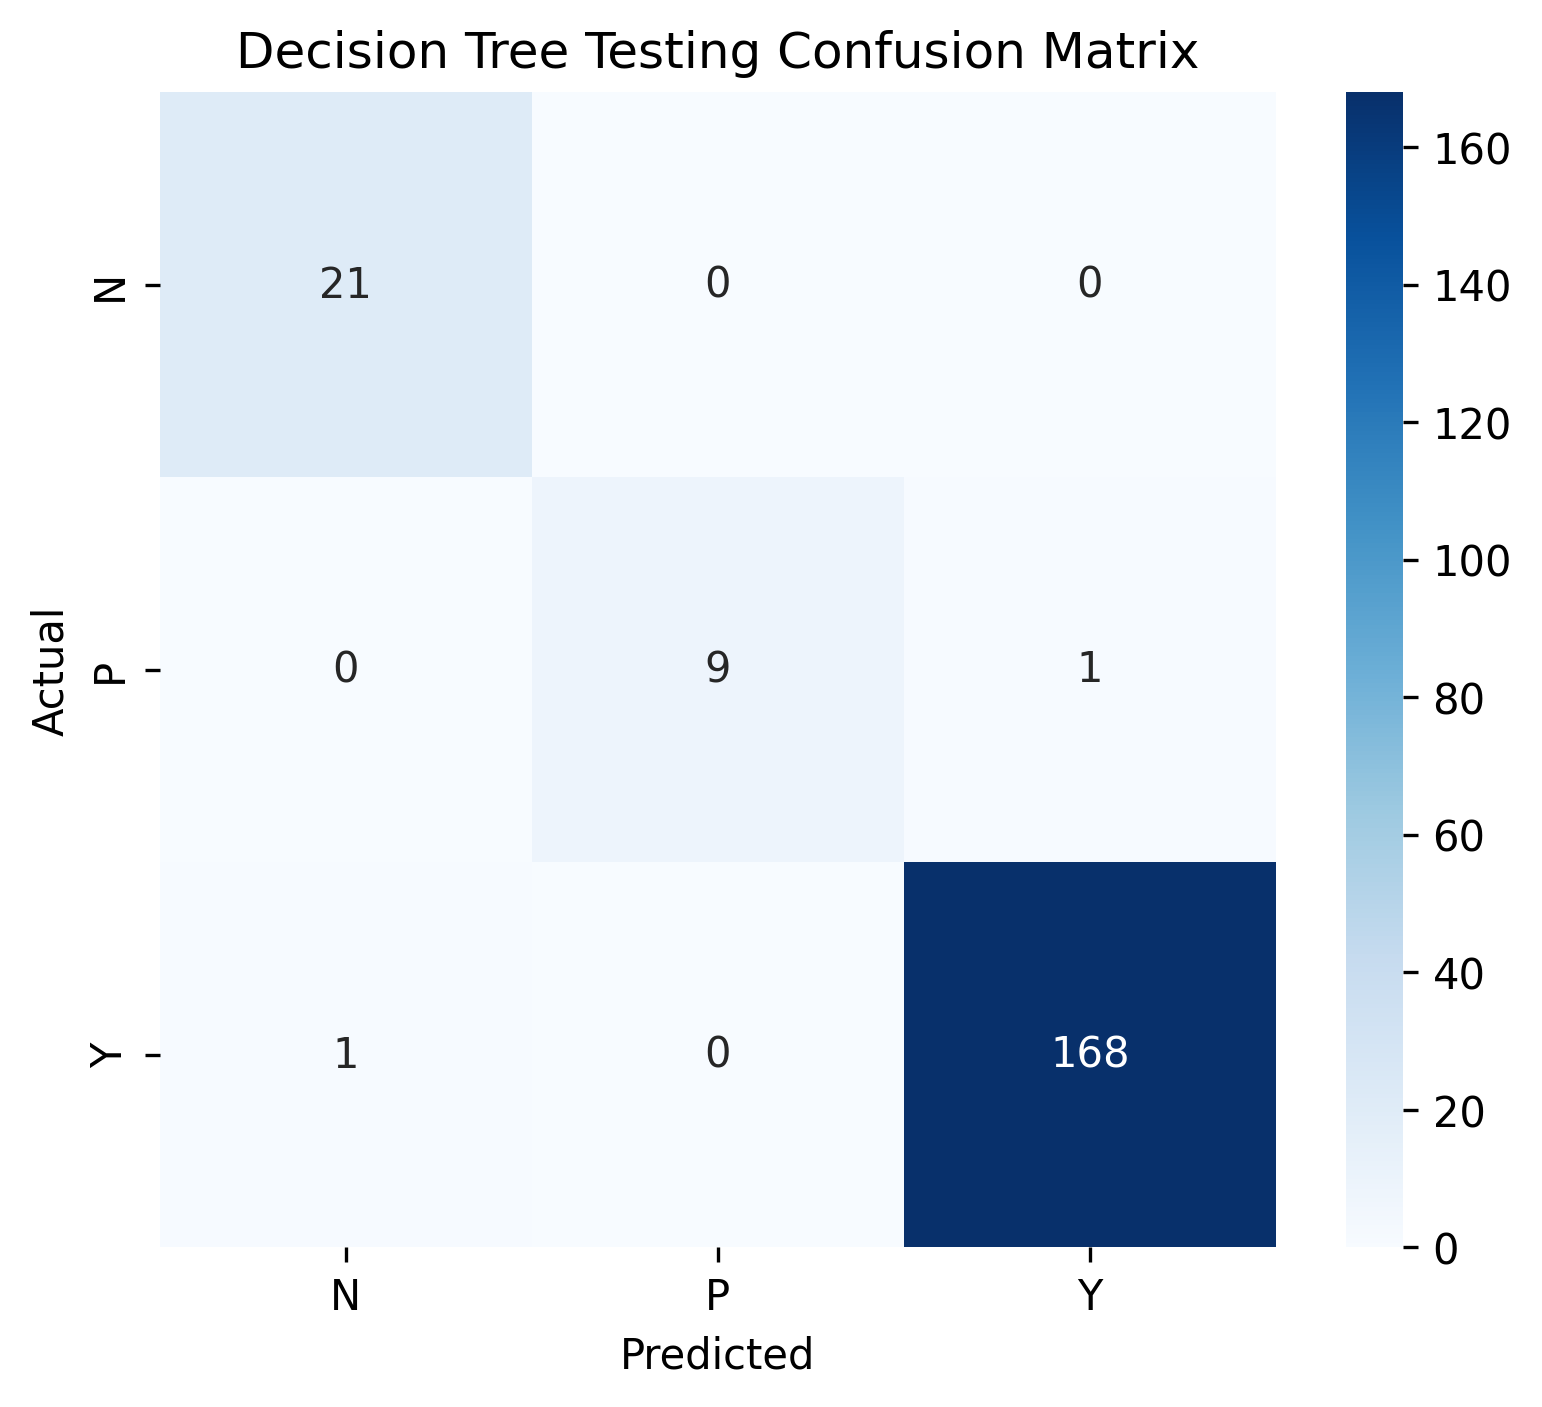

In [33]:
param_grid = {'max_depth': list(range(1, 6)),
              'min_samples_split': list(range(1,6)),
              'min_samples_leaf': list(range(1,6))}  # values to be tested

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X1_train, y1_train)
print("GridSearchCV best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X1_test)

print("\nDecision Tree Testing Data Classification Report:")
classification_report_dt = classification_report(y1_test, y_pred_dt)
print(classification_report_dt)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y1_test, y_pred_dt)
labels = ['N', 'P', 'Y']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Decision Tree Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_dt.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_dt.png', height=500, width=500))

The performance of this model is entirely superior to that of the previous model, showing an accuracy of 99%. However, the model makes the serious mistake of classifying a patient as non-diabetic when the patient is actually diabetic. In a real-world scenario, this error has a high cost.

### Decision Tree Classifier with features selection

A decision tree classifier model works better when there aren't too many features and when those features are highly informative.
By focusing on the features most highly correlated with target variable, an improvement could be made.

GridSearch best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best average accuracy: 0.991

Decision Tree Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



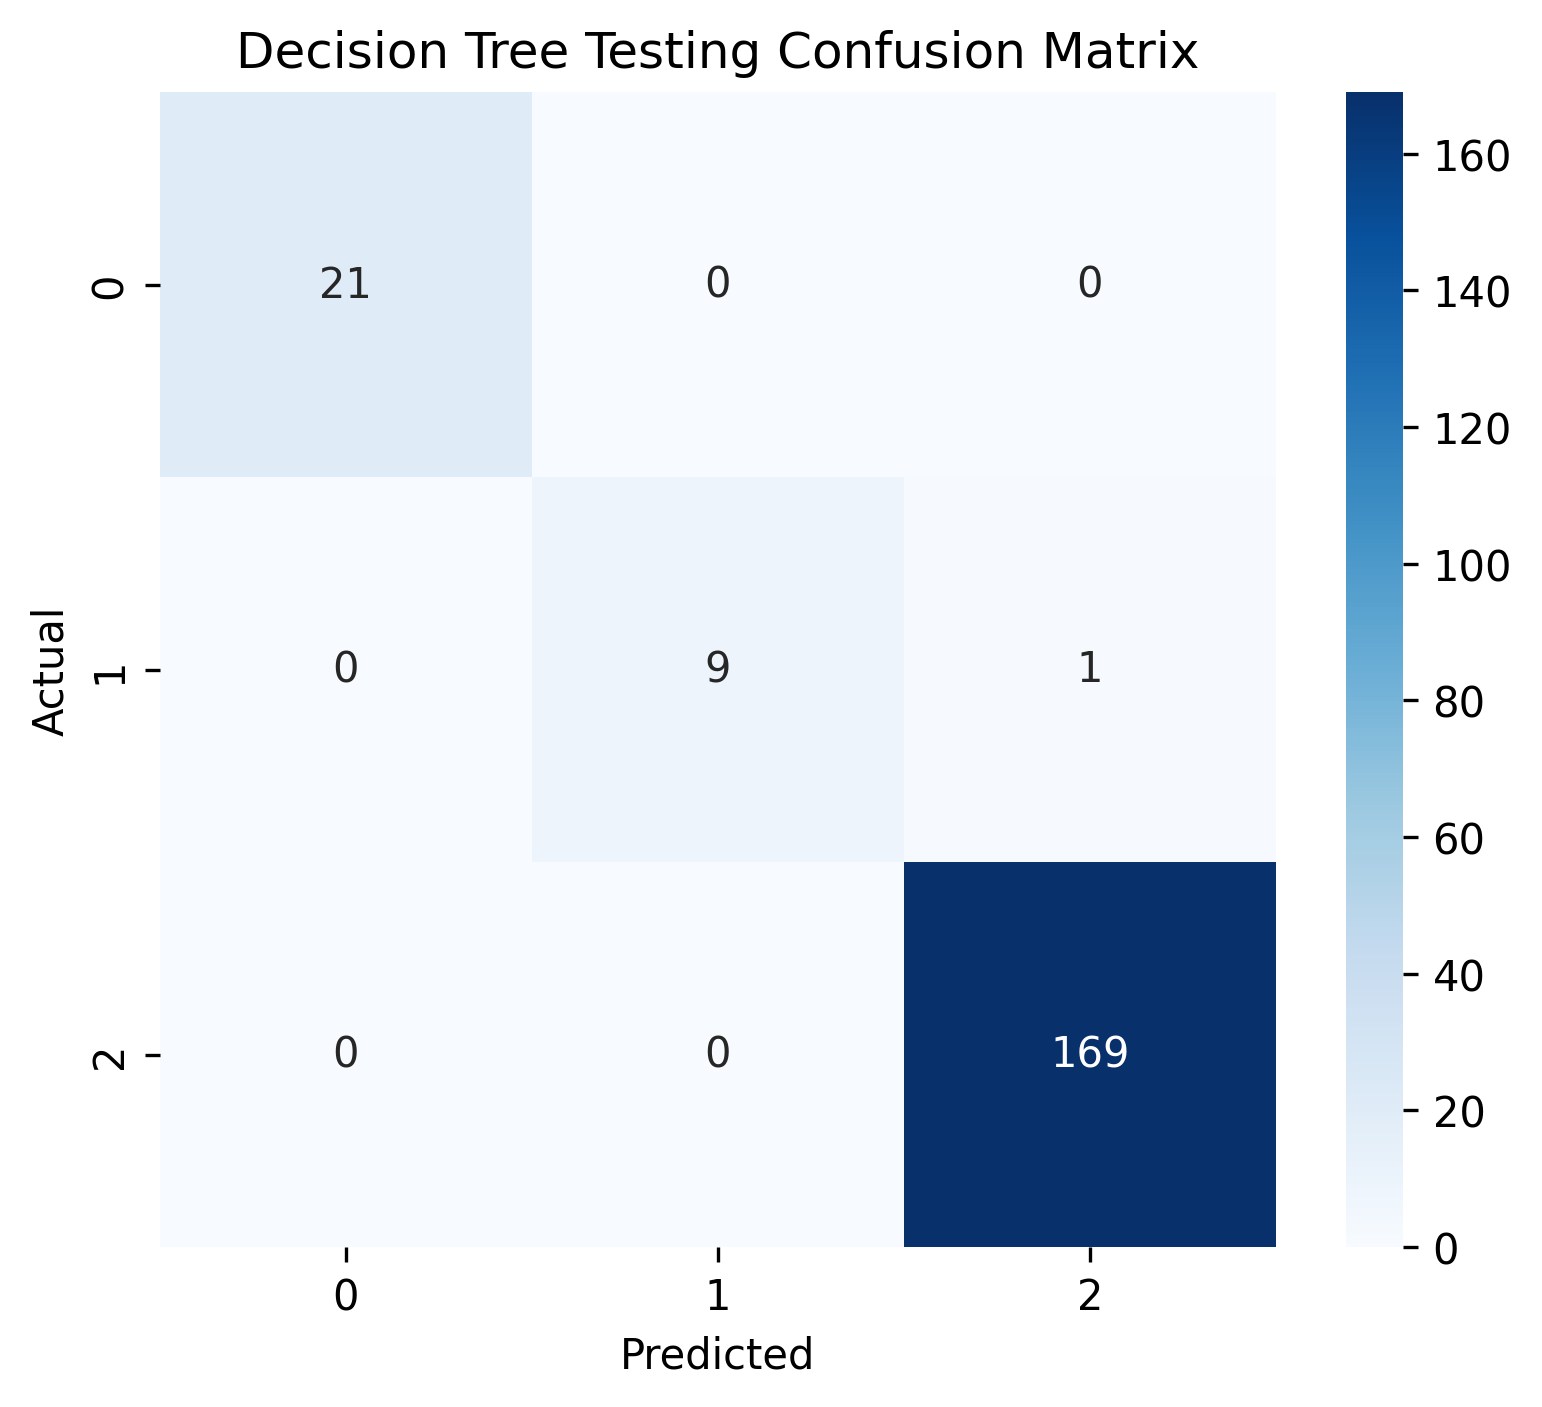

In [34]:
param_grid = {'max_depth': list(range(1, 6)),
              'min_samples_split': list(range(1,6)),
              'min_samples_leaf': list(range(1,6))}  # values to be tested
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X2_train, y2_train)
print("GridSearch best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X2_test)

print("\nDecision Tree Testing Data Classification Report:")
classification_report_dt = classification_report(y2_test, y_pred_dt)
print(classification_report_dt)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y2_test, y_pred_dt)
labels = [0, 1, 2]
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Decision Tree Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_dt2.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_dt2.png', height=500, width=500))

After feature selection, the model accurately classifies diabetic patients and only makes a classification error when dealing with a patient who actually has pre-diabetes. This classification error could be due to the fact that the pre-diabetic patient classified as diabetic exhibits borderline characteristics very similar to those of a diabetic patient.

### Random Forest Classifier

`RandomForestClassifier` hyperparameters:
- `n_estimators`: the number of trees in the forest.;
- `max_depth`: the maximum depth of the tree, if None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples;
- `min_samples_split`: the minimum number of samples required to split an internal node;
- `min_samples_leaf`: the minimum number of samples required to be at a leaf node;
- `criterion`: the function to measure the quality of a split;
- `class_weight`: weights associated with classes, if None, all classes are supposed to have weight one.

GridSearch best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best average accuracy: 0.976

Random Forest Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.80      0.89        10
           2       0.99      0.98      0.98       169

    accuracy                           0.97       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.97      0.97      0.97       200



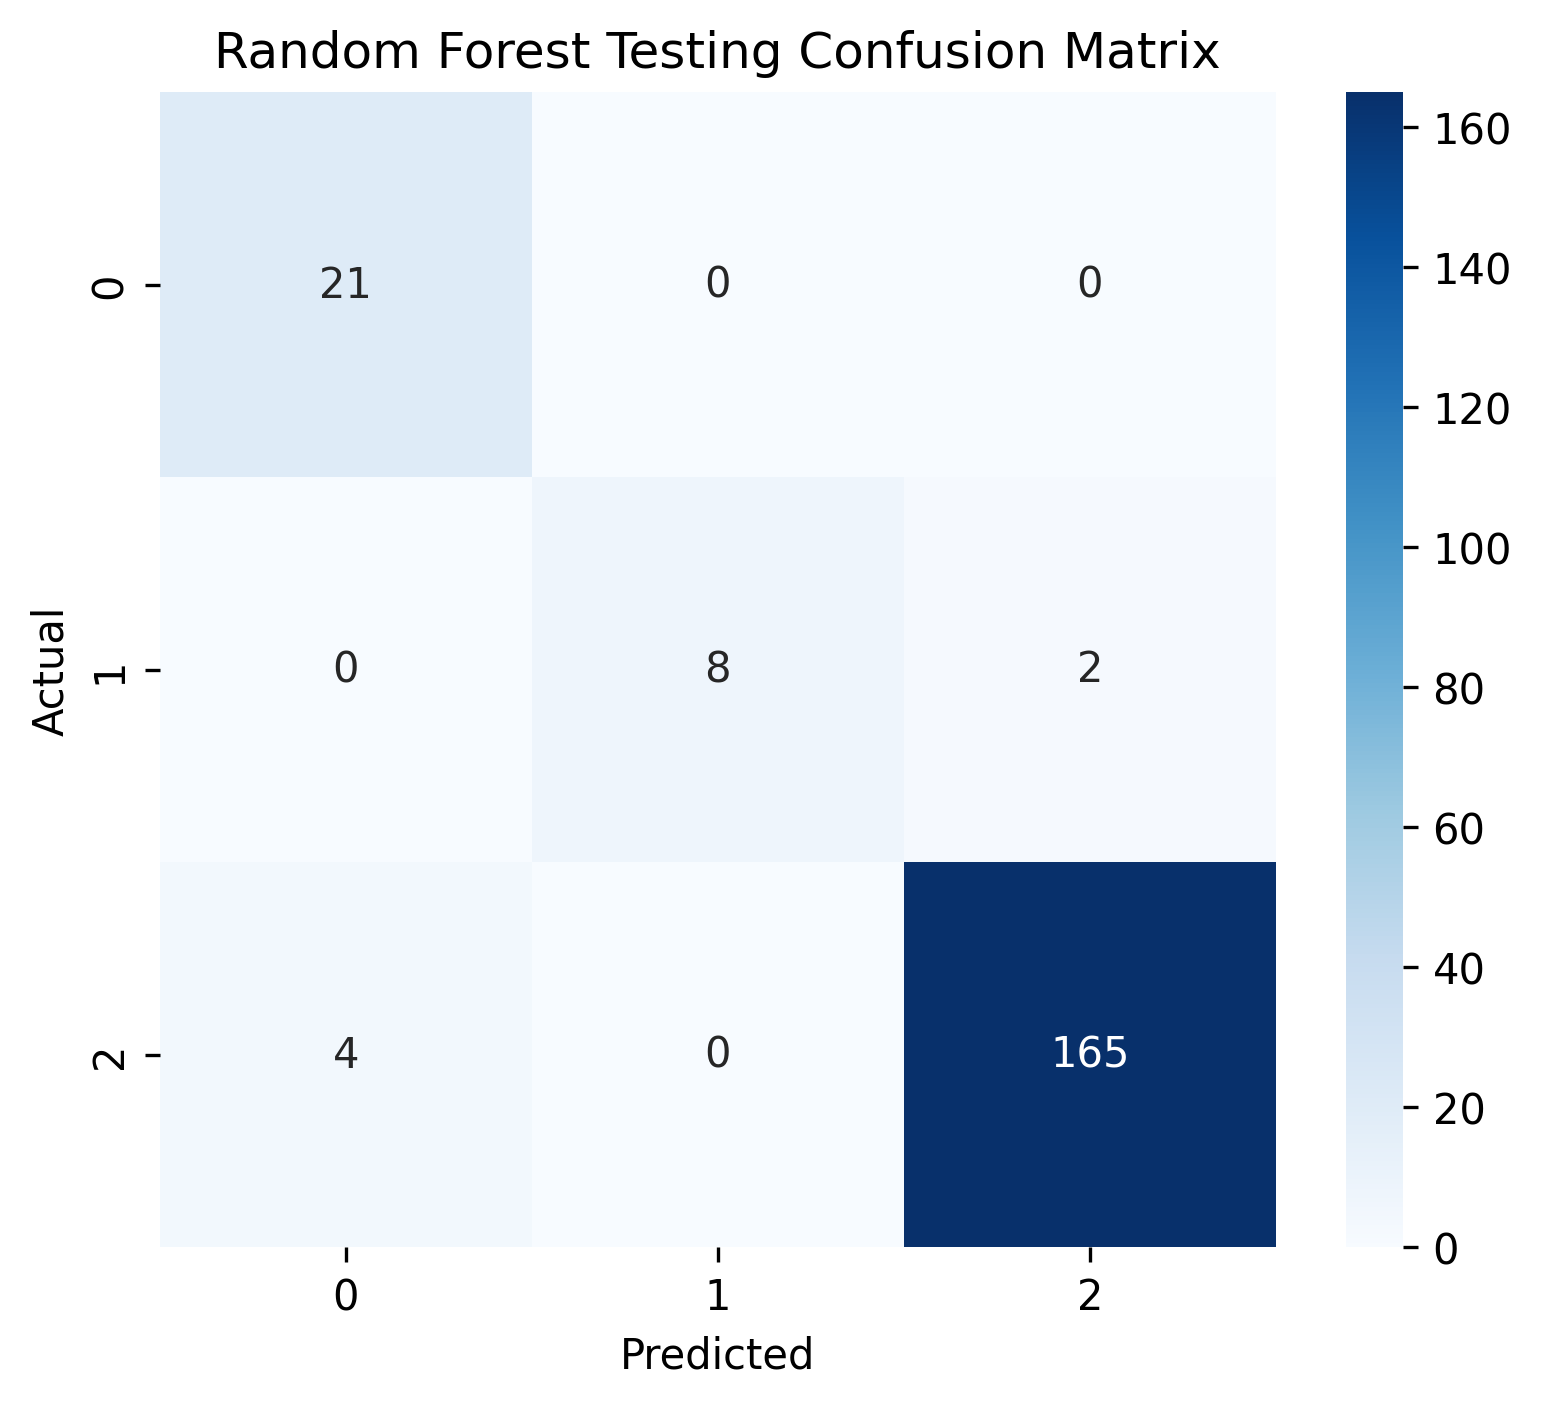

In [35]:
param_grid = {'n_estimators': [None, 150, 200, 300],
              'max_depth': list(range(1, 6)),
              'min_samples_split': [1, 2, 4],
              'min_samples_leaf': [1, 2, 4]}  # values to be tested
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(RandomForestClassifier(criterion='entropy', class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X1_train, y1_train)
print("GridSearch best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X1_test)

print("\nRandom Forest Testing Data Classification Report:")
classification_report_rf = classification_report(y1_test, y_pred_rf)
print(classification_report_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y1_test, y_pred_rf)
labels = ['N', 'P', 'Y']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Random Forest Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_rf.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_rf.png', height=500, width=500))

This model has definitely better performance than Logistic Regression, but slightly worse than that of the Decision Tree. The reason could be that this model struggles when there are many features that are poorly correlated with the target variable.

### Random Forest Classifier with features selection

GridSearch best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best average accuracy: 0.990

Random Forest Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



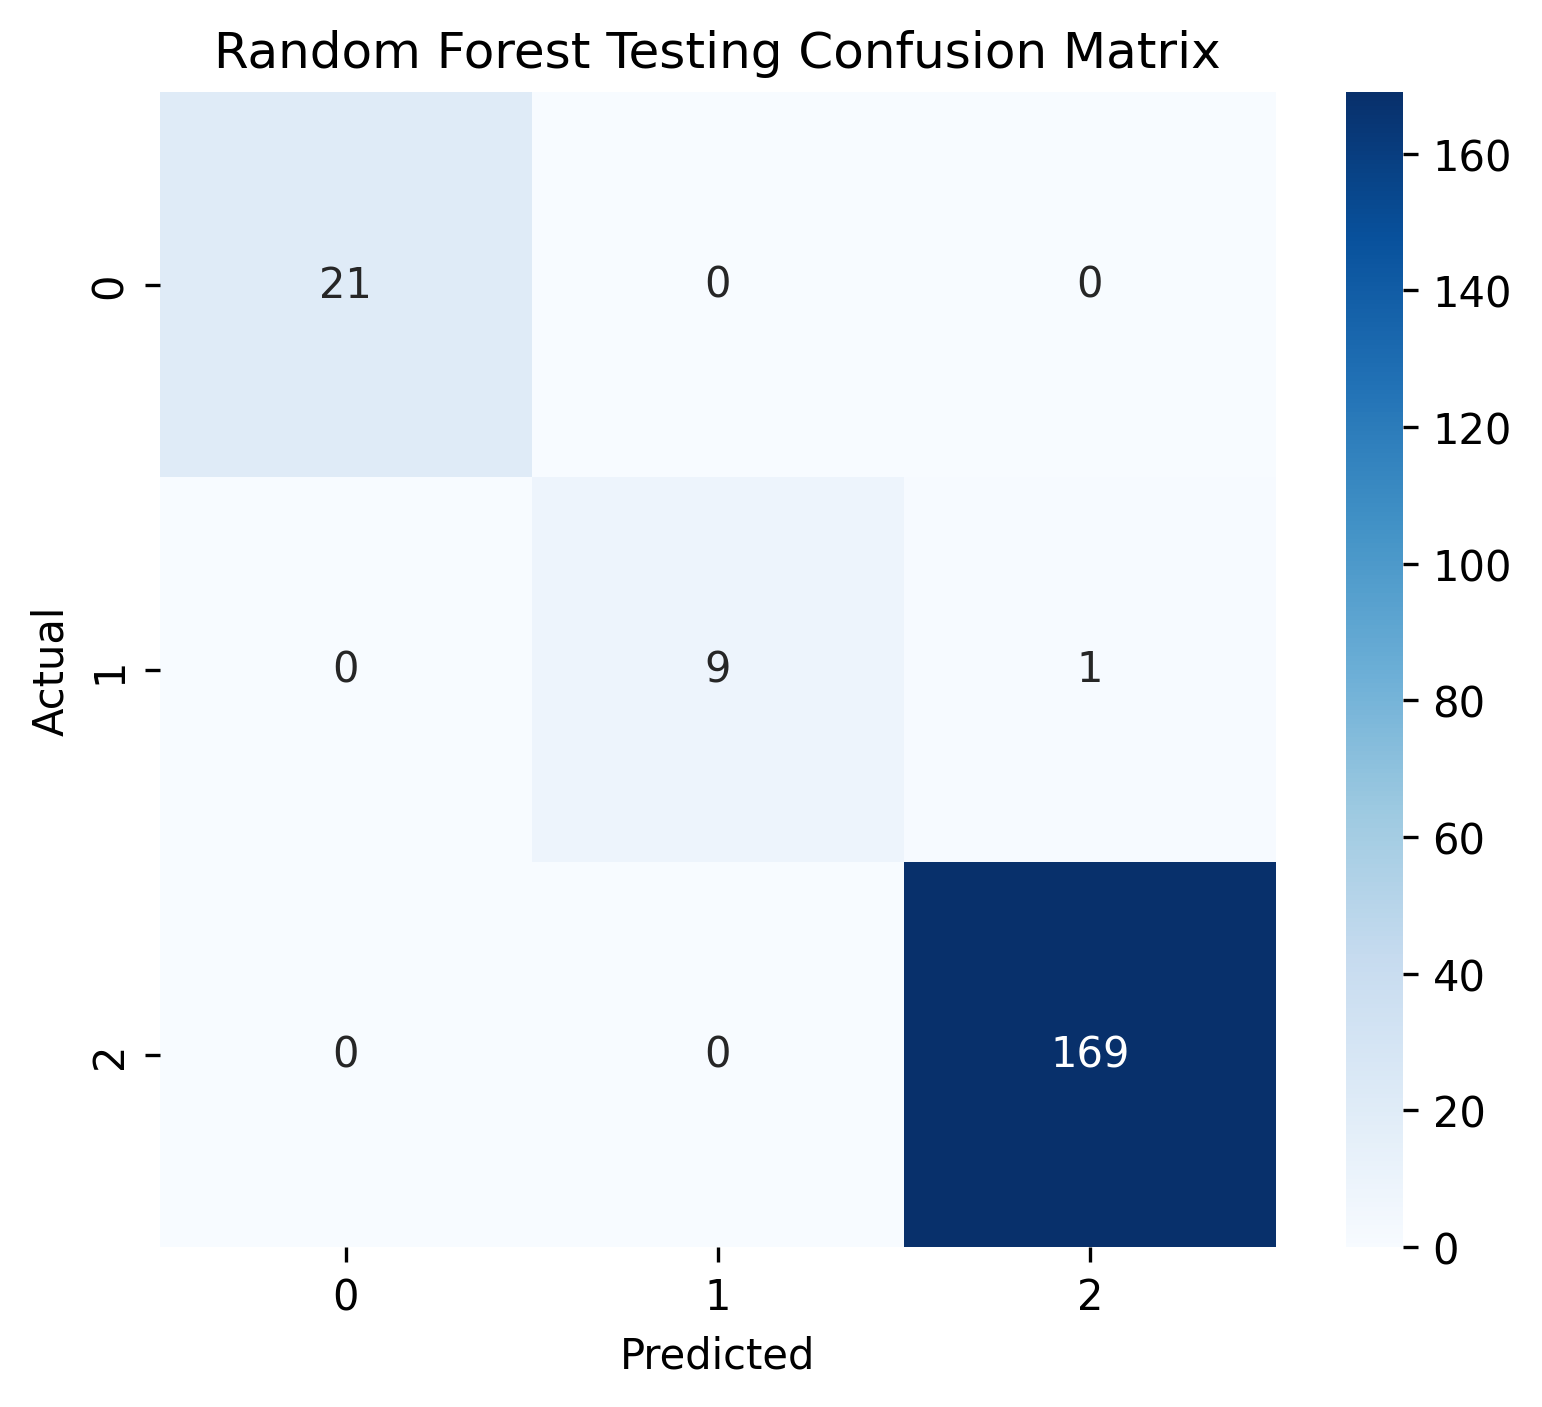

In [36]:
param_grid = {'n_estimators': [None, 150, 200, 300],
              'max_depth': list(range(1, 6)),
              'min_samples_split': [1, 2, 4],
              'min_samples_leaf': [1, 2, 4]}  # values to be tested
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-Validation

grid_search = GridSearchCV(RandomForestClassifier(criterion='entropy', class_weight='balanced'),
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=0)

# Grid search on training set
grid_search.fit(X2_train, y2_train)
print("GridSearch best parameters:", grid_search.best_params_)
print(f"Best average accuracy: {grid_search.best_score_:.3f}" )

# Best model definition
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X2_test)

print("\nRandom Forest Testing Data Classification Report:")
classification_report_rf = classification_report(y2_test, y_pred_rf)
print(classification_report_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y2_test, y_pred_rf)
labels = ['N', 'P', 'Y']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Random Forest Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the image
plt.savefig('/content/conf_matrix_rf2.png', dpi=300, bbox_inches='tight')
plt.close()

display(Image('/content/conf_matrix_rf2.png', height=500, width=500))

The model performs as well as the best-trained Decision Tree once only the features that are most linked with the target variable are chosen. The preceding hypothesis regarding the inherent characteristics of this incorrectly categorized example may be supported by the fact that even this model is unable to prevent that classification error.